## Import potrzebnych bibliotek

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

## Wczytanie oraz zapoznanie się z danymi

In [114]:
job = pd.read_csv('aug_train.csv')
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [115]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [116]:
job.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [117]:
print(job['gender'].isnull())

0        False
1        False
2         True
3         True
4        False
         ...  
19153    False
19154    False
19155    False
19156    False
19157     True
Name: gender, Length: 19158, dtype: bool


In [118]:
job.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [119]:
job.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [120]:
job.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

### Rozkład brakujących danych na przestrzeni całego zbioru

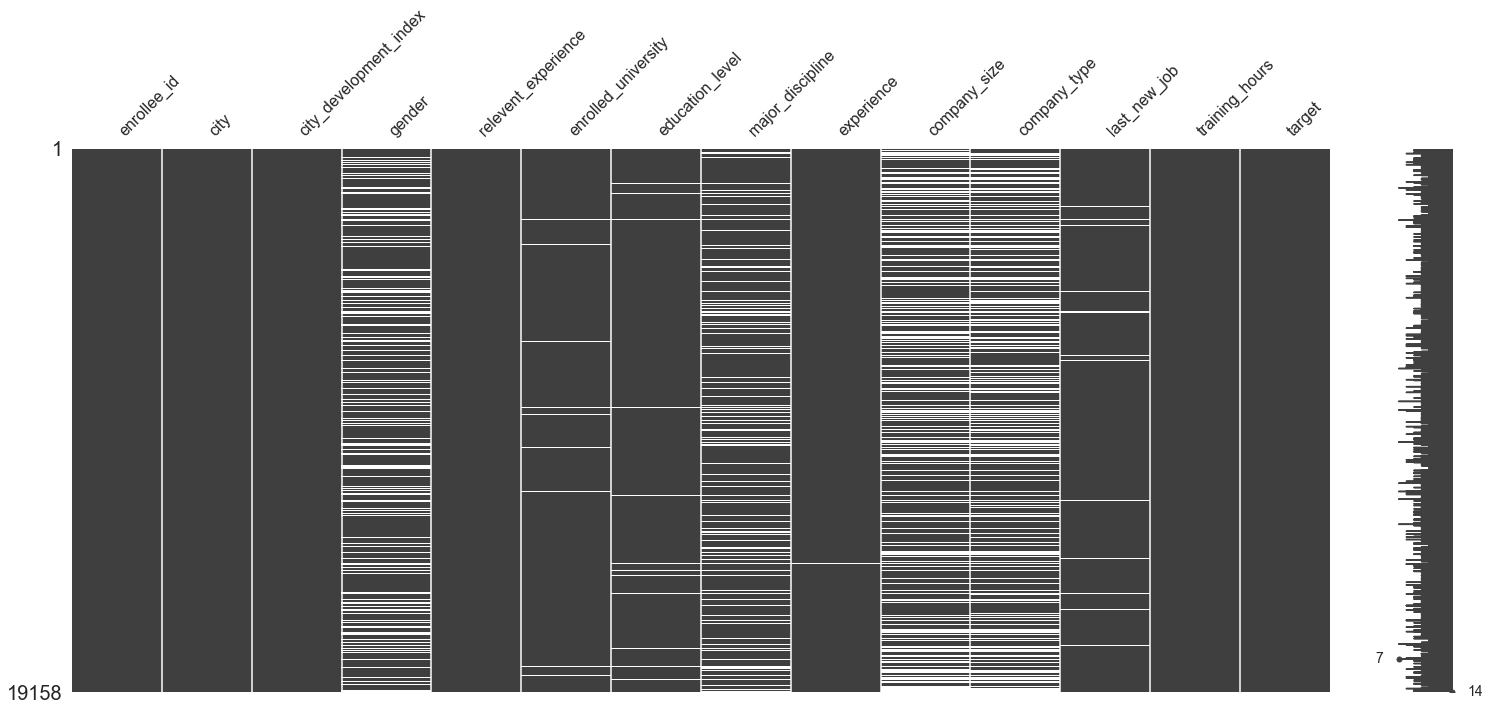

<Figure size 1080x648 with 0 Axes>

In [121]:
msno.matrix(job)
plt.figure(figsize = (15,9))
plt.show()

### Zamiana brakujących danych

In [122]:
job = job.fillna('no info')

### Ustawienie nowego indeksu

In [123]:
job.set_index('enrollee_id', inplace=True)

## Eksploracja danych

### Przedstawienie rozkładu zmiennych ciągłych

In [140]:
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1.4)

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

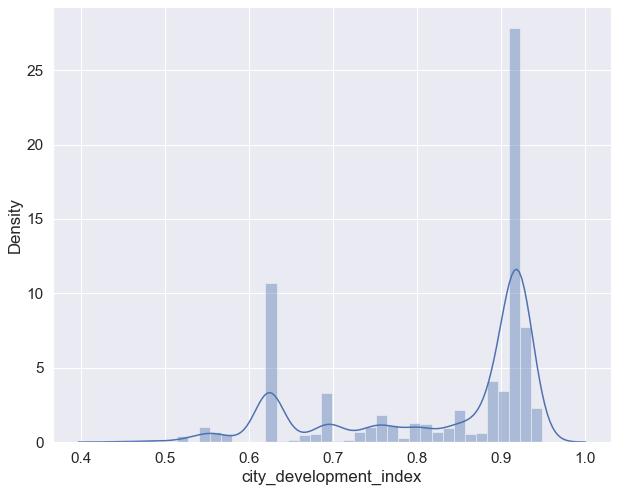

In [141]:
sns.distplot(job['city_development_index'])

C:\Users\Lukasz\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='training_hours', ylabel='Density'>

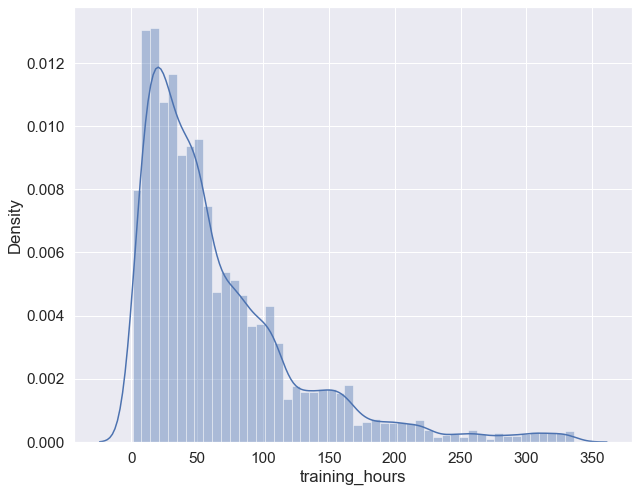

In [142]:
sns.distplot(job['training_hours'])

### Wykresy obrazujące dane

In [127]:
job['company_size'].unique()

array(['no info', '50-99', '<10', '10000+', '5000-9999', '1000-4999',
       '10/49', '100-500', '500-999'], dtype=object)

In [128]:
labels = []

for item in job.groupby('company_size'):
    labels.append(item[0])

In [129]:
target_0 = job[job['target'] == 0]
target_1 = job[job['target'] == 1]

Text(0.5, 1.0, 'Procentowy udział osób, które nie rozważają zmiany pracy w podziale na wielkość firmy')

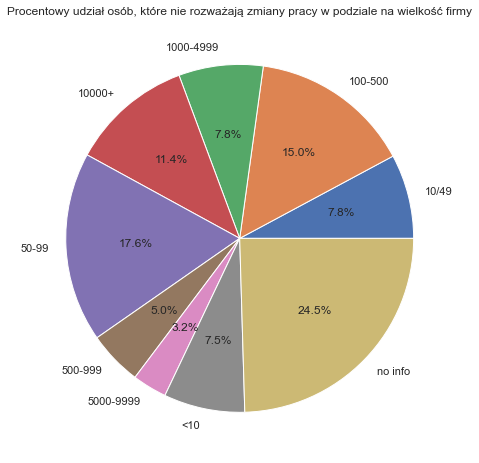

In [130]:
plt.pie(target_0.groupby('company_size').size().values, autopct='%1.1f%%', labels=labels)
plt.title('Procentowy udział osób, które nie rozważają zmiany pracy w podziale na wielkość firmy')

Text(0.5, 1.0, 'Procentowy udział osób, które rozważają zmiany pracy w podziale na wielkość firmy')

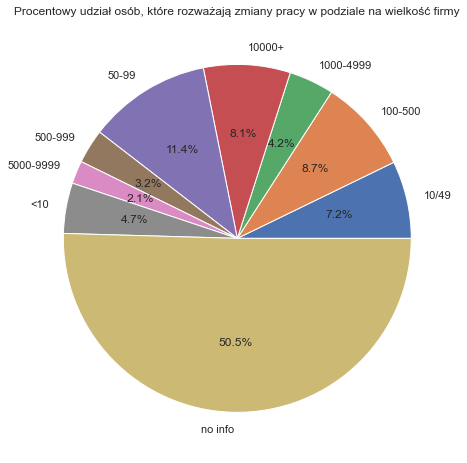

In [131]:
plt.pie(target_1.groupby('company_size').size().values, autopct='%1.1f%%', labels=labels)
plt.title('Procentowy udział osób, które rozważają zmiany pracy w podziale na wielkość firmy')

Text(0.5, 1.0, 'Liczba osób posiadających dany stopień wykształcenia')

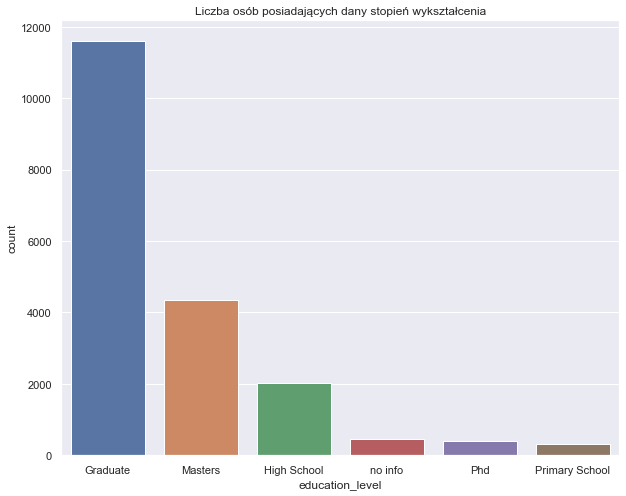

In [132]:
sns.countplot(x = 'education_level', data = job).set_title("Liczba osób posiadających dany stopień wykształcenia")

Text(0.5, 1.0, 'Liczba osób z podziałem na płeć')

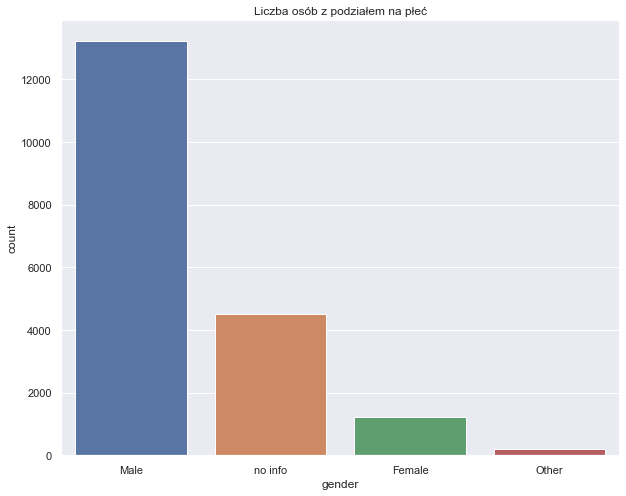

In [133]:
sns.countplot(x = 'gender', data = job).set_title("Liczba osób z podziałem na płeć")

Text(0.5, 1.0, 'Liczba osób mających ukończony pewnien poziom edukacji')

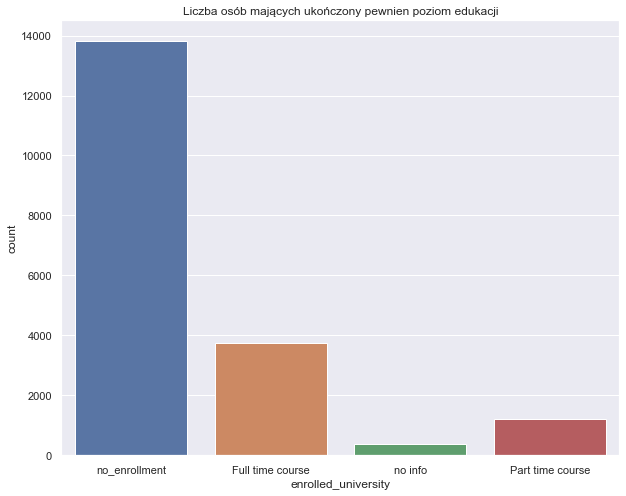

In [134]:
sns.countplot(x = 'enrolled_university', data = job).set_title("Liczba osób mających ukończony pewnien poziom edukacji")

Text(0.5, 1.0, 'Liczba osób z podziałem na rodzaj firmy w której pracują')

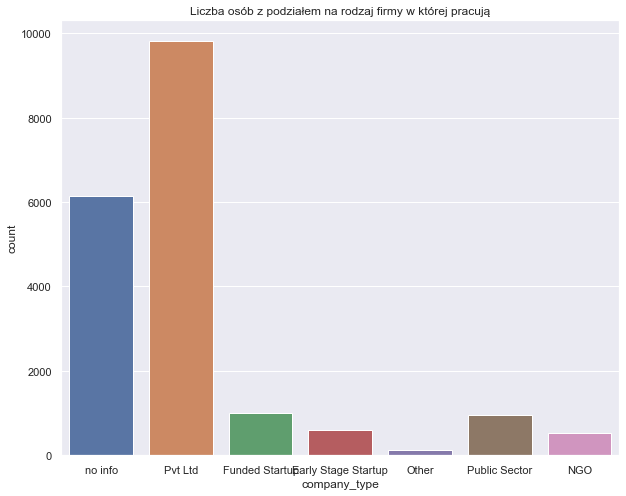

In [135]:
sns.countplot(x = 'company_type', data = job).set_title("Liczba osób z podziałem na rodzaj firmy w której pracują")

Text(0.5, 1.0, 'Liczba osób zmieiających ostatni raz pracę')

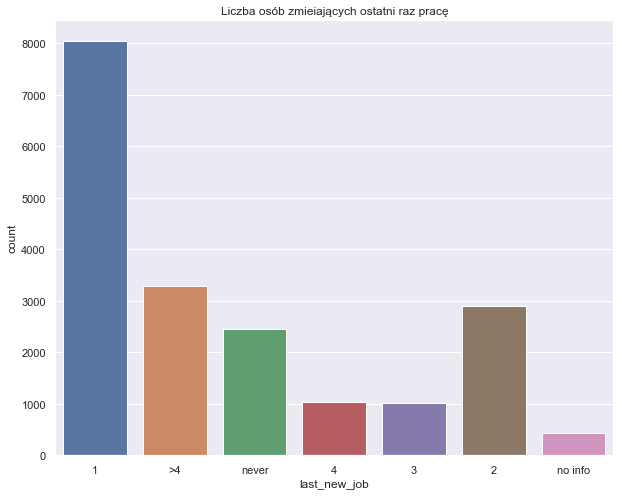

In [136]:
sns.countplot(x = 'last_new_job', data = job).set_title("Liczba osób zmieiających ostatni raz pracę")

Text(0.5, 1.0, 'Liczba osób posiadających doświadczenie z podziałem na ukończony stopień edukacji')

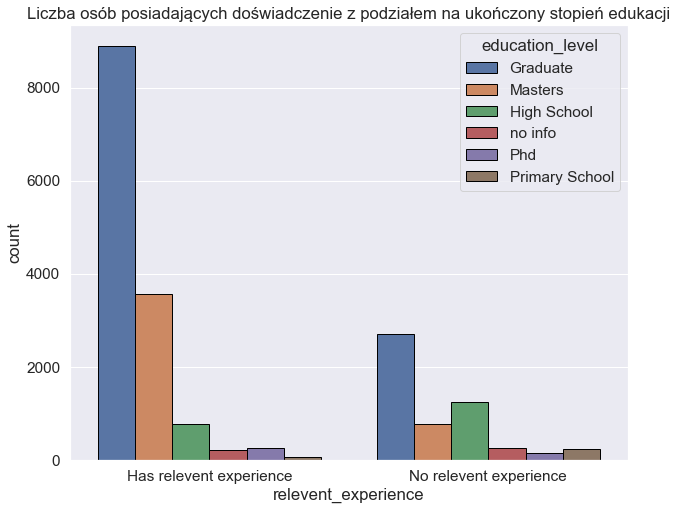

In [143]:
sns.countplot(x='relevent_experience', hue='education_level', edgecolor="black", data=job).set_title("Liczba osób posiadających doświadczenie z podziałem na ukończony stopień edukacji")

Text(0.5, 1.0, 'Liczba osób z stażem pracy w podziale na ukończony stopień edukacji')

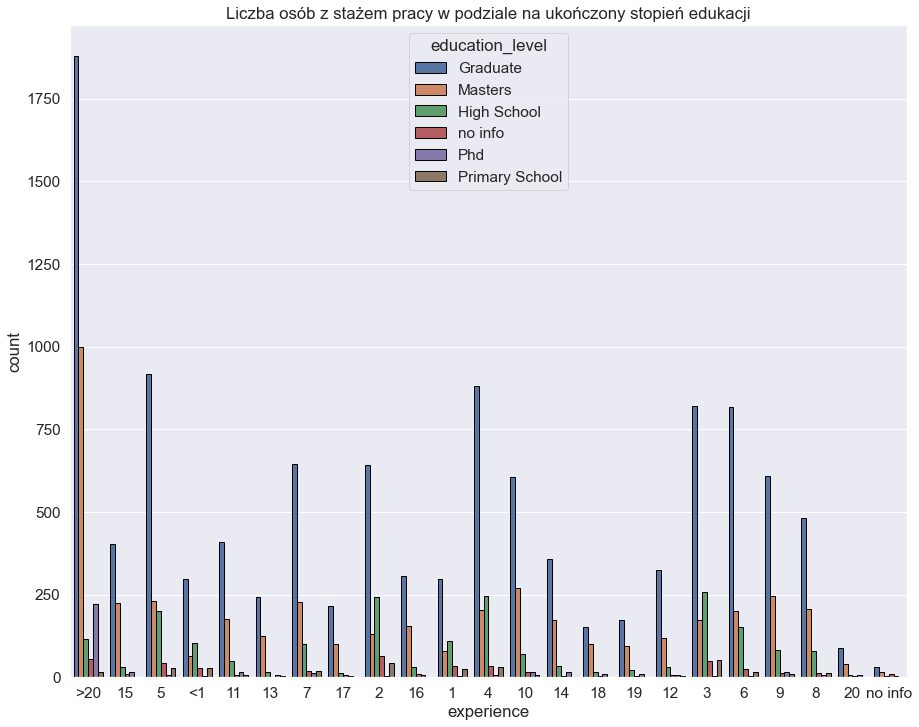

In [146]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.4)

sns.countplot(x='experience', hue='education_level', edgecolor="black", data=job).set_title("Liczba osób z stażem pracy w podziale na ukończony stopień edukacji")

Text(0.5, 1.0, 'Liczba osób pracujacych w róznej wielkości firmach w podziale na ukończony stopień edukacji')

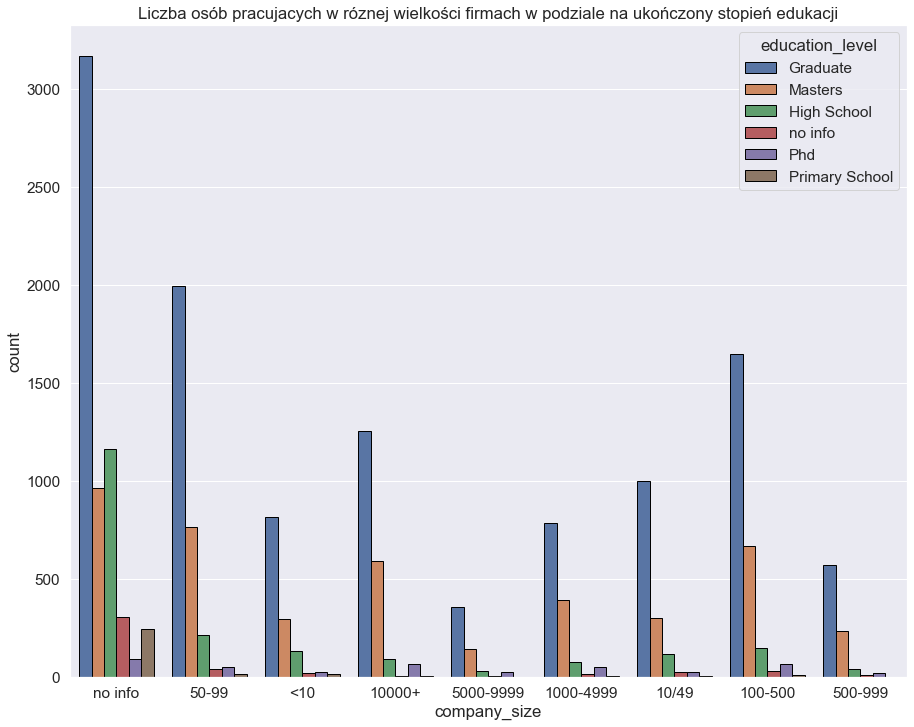

In [147]:
sns.countplot(x='company_size', hue='education_level', edgecolor="black", data=job).set_title("Liczba osób pracujacych w róznej wielkości firmach w podziale na ukończony stopień edukacji")

## Przygotowanie danych na potrzeby algorytmów

In [53]:
job.dtypes

city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [54]:
cat_features = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
                'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

In [55]:
num_features = ['city_development_index', 'training_hours']

In [56]:
target = 'target'

In [57]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

d = defaultdict(LabelEncoder)
job[cat_features] = job[cat_features].apply(lambda x: d[x.name].fit_transform(x))

In [58]:
job[num_features] = job[num_features].apply(lambda x: (x-x.mean())/ x.std())

In [59]:
job

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,5,0.738900,1,0,3,0,5,21,8,6,0,-0.488972,1.0
29725,77,-0.428399,1,1,3,0,5,6,4,5,4,-0.305817,0.0
11561,64,-1.660547,3,1,0,0,5,15,8,6,5,0.293599,0.0
33241,14,-0.323017,3,1,2,0,1,20,8,5,5,-0.222565,1.0
666,50,-0.501355,1,0,3,2,5,21,4,1,3,-0.955184,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,55,0.398438,1,1,3,0,2,5,8,6,0,-0.389069,1.0
31398,5,0.738900,1,0,3,0,5,5,8,6,3,-0.222565,1.0
24576,5,0.738900,1,0,3,0,5,21,4,5,3,-0.355768,0.0


### Pokazanie korelacji w zbiorze danych

In [60]:
coor = job.corr()

<AxesSubplot:>

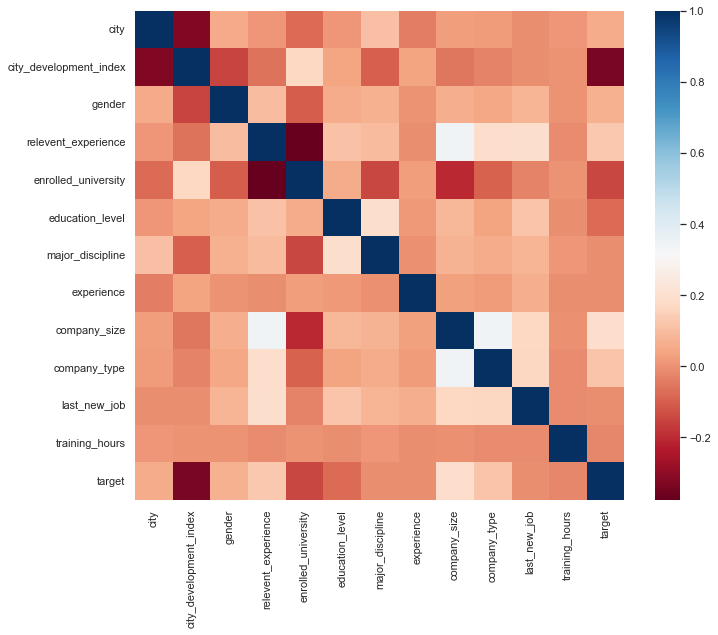

In [61]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(coor, cmap='RdBu', square=True)

In [62]:
features = cat_features + num_features
print(features)

['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'city_development_index', 'training_hours']


## Algorytm kNN

In [63]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import roc_auc_score

def CVTestKNN(nFolds = 5, randomState=2020, debug=False, features=features, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    for train, test in kf.split(job.index.values):
        clf = neighbors.KNeighborsClassifier(*args, **kwargs)
        if debug:
            print(clf)
        clf.fit(job.iloc[train][features], job.iloc[train][target])

        predsTrain = clf.predict_proba(job.iloc[train][features])[:,1]
        preds = clf.predict_proba(job.iloc[test][features])[:,1]
        
        predictions.append(preds.tolist().copy())
        
        indices.append(job.iloc[test].index.tolist().copy())
        
        trainScore = roc_auc_score((job[target].iloc[train]), predsTrain)
        testScore = roc_auc_score((job[target].iloc[test]), preds)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

In [64]:
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=10, n_jobs=-1, p=2, debug=True)
print(np.mean(testResults))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
Train AUC: 0.8430061343780018 Valid AUC: 0.7669403138564684
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
Train AUC: 0.8483677064211805 Valid AUC: 0.7387382655722601
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
Train AUC: 0.843653296648449 Valid AUC: 0.7595865637446093
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
Train AUC: 0.8458409354410261 Valid AUC: 0.7499896066064711
KNeighborsClassif

### Dobór hiperparametrów

In [65]:
for k in [1, 3, 5, 10, 15, 30, 50, 100, 150, 200]:
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=k, n_jobs=-1, p=2)
    print(k, np.mean(trainResults), np.mean(testResults))

1 0.998673797300776 0.6225130353619304
3 0.9165241036216127 0.7008992365090213
5 0.8831636148455088 0.729939714453276
10 0.8457089385874792 0.7531162068472668
15 0.8285061652292522 0.7599083981773378
30 0.8058400243148997 0.7643400373381051
50 0.7938274732475334 0.7657289210239007
100 0.7805291470977525 0.7644134991848512
150 0.7729456728971006 0.7610863734922041
200 0.7666437036024604 0.7574409574123687


### Badanie istotności każdego parametru

In [66]:
results = []
for feature in features:
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=50, n_jobs=-1, p=2, features=[feature])
    print(feature, np.mean(testResults))
    results.append((feature, np.mean(testResults)))

city 0.7084802476129555
gender 0.5405030012917595
relevent_experience 0.4982850161053657
enrolled_university 0.5569922144879901
education_level 0.5508683474664094
major_discipline 0.5046281519536658
experience 0.6009328342491839
company_size 0.6317895138435605
company_type 0.6211131503351317
last_new_job 0.5422966995050967
city_development_index 0.7153949097069715
training_hours 0.5046635915099413


In [67]:
results = sorted(results, key=lambda x: x[1], reverse=True)
results

[('city_development_index', 0.7153949097069715),
 ('city', 0.7084802476129555),
 ('company_size', 0.6317895138435605),
 ('company_type', 0.6211131503351317),
 ('experience', 0.6009328342491839),
 ('enrolled_university', 0.5569922144879901),
 ('education_level', 0.5508683474664094),
 ('last_new_job', 0.5422966995050967),
 ('gender', 0.5405030012917595),
 ('training_hours', 0.5046635915099413),
 ('major_discipline', 0.5046281519536658),
 ('relevent_experience', 0.4982850161053657)]

##### Badamy czy usunięcie najmniej wpływowych parametrów wpływa na poprawę pracy algorytmu

In [68]:
featuresSet2 = [x for x,y in results if y > 0.5]
print(featuresSet2)

['city_development_index', 'city', 'company_size', 'company_type', 'experience', 'enrolled_university', 'education_level', 'last_new_job', 'gender', 'training_hours', 'major_discipline']


In [69]:
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=50, n_jobs=-1, p=2, features=featuresSet2)
print(np.mean(testResults))

0.7652402233840926


In [70]:
featuresSet3 = [x for x,y in results if y > 0.51]
print(featuresSet3)

['city_development_index', 'city', 'company_size', 'company_type', 'experience', 'enrolled_university', 'education_level', 'last_new_job', 'gender']


In [71]:
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=50, n_jobs=-1, p=2, features=featuresSet3)
print(np.mean(testResults))

0.7656509575914645


### Wytrenowanie i zapisanie wyników najlepszego modelu

In [72]:
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=50, n_jobs=-1, p=2, features=featuresSet3)
print('50', np.mean(testResults))

modelkNN = {
    "name":"KNN",
    "description":"Pierwszy dopracowany model KNN, 50 sąsiadów",
    "specification":'n_neighbors=50, n_jobs=-1, p=2, features=features',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

50 0.7656509575914645


In [73]:
import pickle

with open("model_kNN_1.p", "wb") as fp:
    pickle.dump(modelkNN, fp)

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier


def CVTestRFClass(nFolds = 5, randomState=2020, debug=False, features=features, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    for train, test in kf.split(job.index.values):
        clf = RandomForestClassifier(*args, **kwargs, random_state=randomState, n_jobs=-1)
        if debug:
            print(clf)

        clf.fit(job.iloc[train][features], job.iloc[train][target])

        predsTrain = clf.predict_proba(job.iloc[train][features])[:,1]
        preds = clf.predict_proba(job.iloc[test][features])[:,1]
        
        predictions.append(preds.tolist().copy())
        
        indices.append(job.iloc[test].index.tolist().copy())
        
        trainScore = roc_auc_score((job[target].iloc[train]), predsTrain)
        testScore = roc_auc_score((job[target].iloc[test]), preds)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

In [77]:
trainResults, testResults, predictions, indices = CVTestRFClass(debug=True)
print(np.mean(testResults))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2020, verbose=0,
                       warm_start=False)
Train AUC: 0.9999920689607681 Valid AUC: 0.8052967116290207
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_

### Dostrajanie hiperparametrów

In [78]:
for k in [10, 25, 50, 100, 200, 500, 1000]:
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=k)
    print(k, np.mean(trainResults), np.mean(testResults), np.mean(trainResults) - np.mean(testResults))

10 0.9986861447598969 0.7613033826600106 0.2373827620998863
25 0.9999198528208872 0.7797554595718701 0.22016439324901715
50 0.9999825921840589 0.7844291085333095 0.21555348365074944
100 0.9999908762346973 0.787573116039513 0.21241776019518432
200 0.9999957376343567 0.7893618536093633 0.2106338840249934
500 0.9999965318754993 0.7904717603898416 0.20952477148565773
1000 0.9999966502004041 0.7906919592129442 0.20930469098745985


In [79]:
for k in range(2,22,2):
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100, max_depth=k)
    print(k, np.mean(trainResults), np.mean(testResults), np.mean(trainResults) - np.mean(testResults))

2 0.7868255517096876 0.7859585479035697 0.0008670038061179275
4 0.799309346049607 0.7935904648853764 0.005718881164230583
6 0.8195515620945623 0.798311935010088 0.021239627084474244
8 0.8535575644154246 0.8028413406356781 0.050716223779746494
10 0.894729164299717 0.8022909279405587 0.09243823635915838
12 0.932726731894518 0.802586384144063 0.13014034775045502
14 0.9622967825779449 0.8002909764893126 0.16200580608863235
16 0.9802314286174939 0.7990854191319731 0.18114600948552084
18 0.9907168456936981 0.7946026618779957 0.19611418381570245
20 0.99623783818286 0.7937329083549288 0.20250492982793122


In [80]:
print(len(features))

12


In [81]:
for k in range(2, len(features) + 1,2):
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100, max_depth=10,
                                                                    max_features=k)
    print(k, np.mean(trainResults), np.mean(testResults), np.mean(trainResults) - np.mean(testResults))

2 0.8869093789057716 0.8024039922060693 0.08450538669970231
4 0.899057613478214 0.8023171613586049 0.09674045211960913
6 0.9033751908538104 0.8022911269743374 0.101084063879473
8 0.9049470227926889 0.801853788225808 0.10309323456688091
10 0.9066165194168768 0.8005862662070694 0.10603025320980741
12 0.9068715533643384 0.8007146128169499 0.10615694054738856


In [82]:
for k in [2, 4, 6, 8, 10, 15, 20, 30]:
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100, max_depth=10,
                                                                    max_features=4,
                                                                    min_samples_split=k)
    print(k, np.mean(testResults))

2 0.8023171613586049
4 0.8034999097912665
6 0.8023592478910876
8 0.8029625406366389
10 0.8035634496845867
15 0.8031561648053746
20 0.8038244628231466
30 0.8034460818625506


In [83]:
for k in [1, 2, 4, 8]:
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100, max_depth=10,
                                                                    max_features=4,
                                                                    min_samples_split=10, min_samples_leaf=k)
    print(k, np.mean(testResults))

1 0.8035634496845867
2 0.8029006592381922
4 0.803674637195606
8 0.8031192709040594


In [84]:
results=[]
import random
for k in range(50):
    params = {
        "max_depth" : random.randint(2, 14),
        "max_features" : random.randint(2, 12),
        "min_samples_split" : random.randint(2, 12),
    }
    params["min_samples_leaf"] = random.randint(1, params["min_samples_split"])
    
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100,
                                                                    max_depth=params["max_depth"],
                                                                    max_features=params["max_features"],
                                                                    min_samples_split=params["min_samples_split"],
                                                                    min_samples_leaf=params["min_samples_leaf"])
    
    results.append((np.mean(testResults), params.copy()))
    
    print(params, np.mean(testResults))
    
    if k>1 and k%10==0:    
        print("\n Top 5:")
        for score, params in sorted(results, key=lambda x: x[0], reverse=True)[0:5]:
            print(params, score)
        print()

{'max_depth': 11, 'max_features': 12, 'min_samples_split': 7, 'min_samples_leaf': 5} 0.8002099667873939
{'max_depth': 3, 'max_features': 7, 'min_samples_split': 2, 'min_samples_leaf': 1} 0.7915577419290696
{'max_depth': 14, 'max_features': 4, 'min_samples_split': 8, 'min_samples_leaf': 8} 0.8027631925179755
{'max_depth': 7, 'max_features': 2, 'min_samples_split': 6, 'min_samples_leaf': 2} 0.7990098950562825
{'max_depth': 6, 'max_features': 4, 'min_samples_split': 3, 'min_samples_leaf': 3} 0.8004301387968139
{'max_depth': 8, 'max_features': 3, 'min_samples_split': 7, 'min_samples_leaf': 1} 0.8017732006678526
{'max_depth': 11, 'max_features': 9, 'min_samples_split': 6, 'min_samples_leaf': 1} 0.8002085074056714
{'max_depth': 13, 'max_features': 5, 'min_samples_split': 4, 'min_samples_leaf': 4} 0.8010740194404988
{'max_depth': 3, 'max_features': 3, 'min_samples_split': 12, 'min_samples_leaf': 8} 0.7912313892678672
{'max_depth': 5, 'max_features': 12, 'min_samples_split': 3, 'min_samples_le

In [85]:
trainResults, testResults, predictions, indices = CVTestRFClass(max_depth=10, max_features=3, min_samples_split=8, min_samples_leaf=6)
print(np.mean(testResults))

modelRFClass = {
    "name":"RFC",
    "description":"Pierwszy dopracowany model Random Forest",
    "specification":'max_depth=9, max_features=4, min_samples_split=6, min_samples_leaf=6',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

0.8036879555812388


In [86]:
with open("model_RFC_1.p", "wb") as fp:
    pickle.dump(modelRFClass, fp)

## Algorytm XGBoost

In [87]:
import xgboost as xgb
import time

from sklearn.model_selection import train_test_split

from random import shuffle
from random import randint
from operator import itemgetter

In [88]:
def run_xgb(train, validate, features, target, # argumenty obowiązkowe
            eta=0.03, max_depth=7, subsample = 0.7, colsample_bytree = 0.7, # hiperparametry
            colsample_bylevel=1,lambdaX = 1, alpha=0, gamma=0, min_child_weight=0, # hiperparametry
            rate_drop = 0.2, skip_drop=0.5, # hiperparametry
            num_boost_round = 1000, early_stopping_rounds = 50, # hiperparametry
            debug=True, eval_metric= ["auc"], objective = "binary:logistic", # konfiguracja
            seed=2017, booster = "gbtree", tree_method="exact", grow_policy="depthwise"): # konfiguracja

    start_time = time.time()
    paramList= ['eta', 'max_depth',
         'subsample', 'colsample_bytree', 'colsample_bylevel',
         'lambdaX', 'alpha', 'gamma', 'min_child_weight',
         'num_boost_round', 'early_stopping_rounds',
         'rate_drop', 'skip_drop',
         'eval_metric', 'objective', 
          'seed', 'booster', 'tree_method', 'grow_policy']
    
    params = dict()
    for param in paramList:
        params[param]=eval(param)
    if(debug):
        for param in paramList:
            print(param, eval(param), end=", ")
        print('\nLength train:', len(train.index))
        print('Length valid:', len(validate.index))

    if (params["objective"]=="multi:softmax" or params["objective"]=="multi:softprob"):
        params["num_class"]=train[target].nunique()
    params["silent"]=1
    
    params["lambda"]=lambdaX
    
    dtrain = xgb.DMatrix(train[features].values, train[target].values, feature_names=train[features].columns.values)
    dvalid = xgb.DMatrix(validate[features].values, validate[target].values, feature_names=validate[features].columns.values)

    evals = [(dtrain, 'train'), (dvalid, 'valid')]
    
    train_history = dict()

    gbm = xgb.train(params, dtrain, 
                    num_boost_round, early_stopping_rounds=early_stopping_rounds,
                    evals=evals, evals_result=train_history, verbose_eval=debug)
    
    score = gbm.best_score

    trainHistory = dict()
    for key in train_history.keys():
        for metric in train_history[key].keys():
            trainHistory[key+metric.upper()]=train_history[key][metric]
    train_history = pd.DataFrame(trainHistory)

    trainPred = gbm.predict(dtrain, iteration_range=(0, gbm.best_iteration+1))
    testPred = gbm.predict(dvalid, iteration_range=(0, gbm.best_iteration+1))

    imp = gbm.get_fscore()
    imp = sorted(imp.items(), key=itemgetter(1), reverse=True)

    impFig=None
    if(debug):
        print('Czas trenowania: {} minut'.format(round((time.time() - start_time)/60, 2)))
        impFig, ax = plt.subplots()
        xgb.plot_importance(gbm, ax=ax)
    return score, trainPred, testPred, train_history, impFig, imp

In [89]:
test_size = 0.2
X_train, X_valid = train_test_split(job, test_size=test_size, random_state=2017, stratify=job[target].values)

In [90]:
xgb.set_config(verbosity = 0)

#### Pierwsze uruchomienie algorytmu XGB

eta 0.03, max_depth 7, subsample 0.7, colsample_bytree 0.7, colsample_bylevel 1, lambdaX 1, alpha 0, gamma 0, min_child_weight 0, num_boost_round 1000, early_stopping_rounds 50, rate_drop 0.2, skip_drop 0.5, eval_metric ['auc'], objective binary:logistic, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 15326
Length valid: 3832
[0]	train-auc:0.79299	valid-auc:0.77968
[1]	train-auc:0.80455	valid-auc:0.78771
[2]	train-auc:0.81510	valid-auc:0.80210
[3]	train-auc:0.81954	valid-auc:0.80123
[4]	train-auc:0.82020	valid-auc:0.80217
[5]	train-auc:0.82249	valid-auc:0.80387
[6]	train-auc:0.82266	valid-auc:0.80499
[7]	train-auc:0.82474	valid-auc:0.80327
[8]	train-auc:0.82581	valid-auc:0.80206
[9]	train-auc:0.82818	valid-auc:0.80157
[10]	train-auc:0.82955	valid-auc:0.80316
[11]	train-auc:0.83077	valid-auc:0.80271
[12]	train-auc:0.83195	valid-auc:0.80268
[13]	train-auc:0.83218	valid-auc:0.80341
[14]	train-auc:0.83232	valid-auc:0.80340
[15]	train-auc:0.83221	valid-a

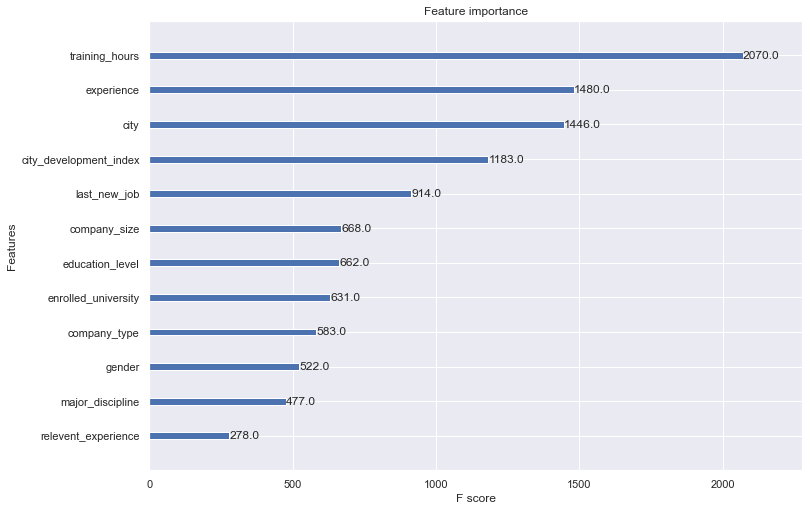

In [91]:
score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, 
                                                                 features, target, 
                                                                 early_stopping_rounds=50)

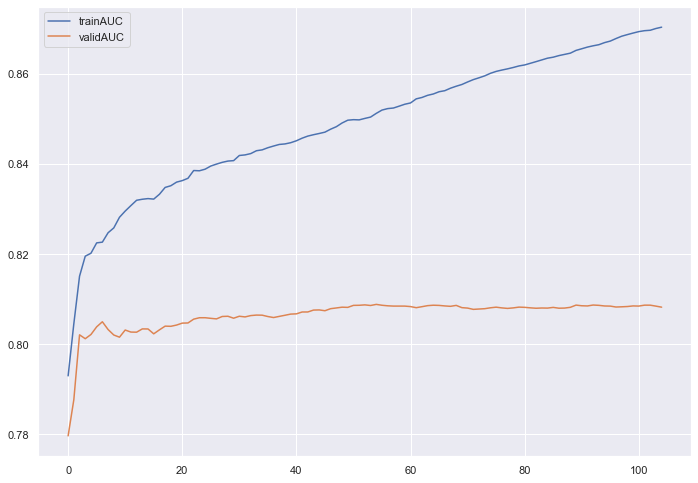

In [92]:
train_history.plot()
plt.show()

### Dostrajanie hiperparametrów

2 0.8060375936976235
4 0.8098568353087404
6 0.808462130600702
8 0.8081316525540166
10 0.8058350485071164
12 0.8054807309097063
14 0.8036993159322812


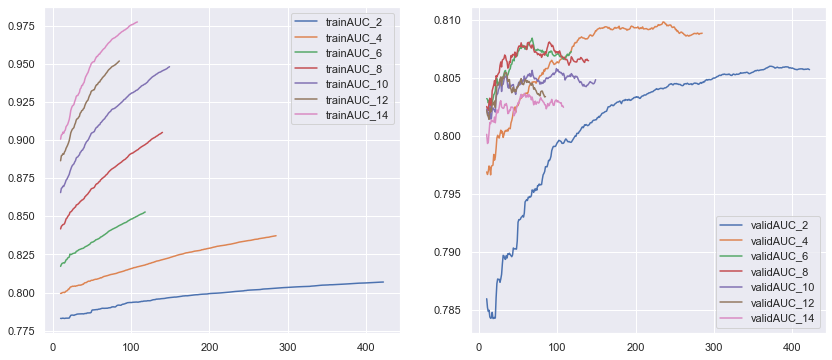

In [93]:
resHists = dict()
rang = range(2,15,2)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=x, early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

0.3 0.8106395368939795
0.4 0.8090470185093184
0.5 0.8091329136844481
0.6 0.8095787678773883
0.7 0.8098568353087404
0.8 0.8096097046989392
0.9 0.8091063444141748


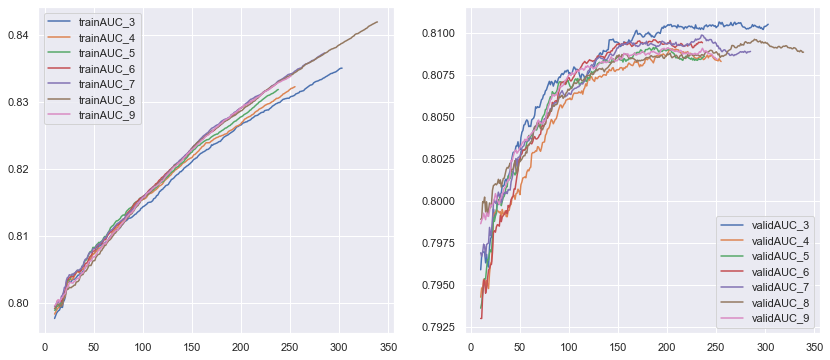

In [94]:
resHists = dict()
rang = range(3,10)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=4,  subsample=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x/10, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

0.3 0.8093105274364112
0.4 0.808054856444049
0.5 0.8082397494481417
0.6 0.8088169941420218
0.7 0.8098568353087404
0.8 0.8090086204543345
0.9 0.810005332052185


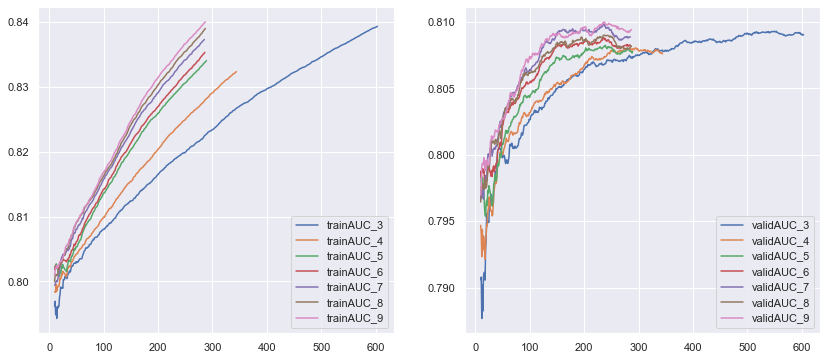

In [95]:
resHists = dict()
rang = range(3,10)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=4, subsample=0.7, colsample_bytree=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x/10, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

3 0.8091869621315106
4 0.8105978631755374
5 0.8111239711232068
6 0.8111239711232068
7 0.8103641991821761
8 0.8094921447770456
9 0.8094368224608604
10 0.8098568353087404


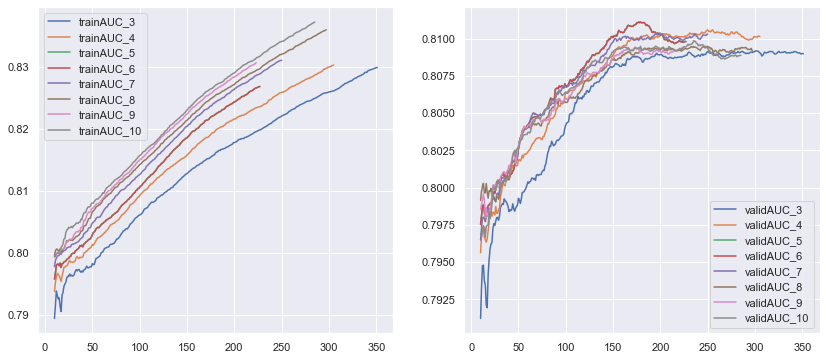

In [96]:
resHists = dict()
rang = range(3,11)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=4, subsample=0.7, colsample_bytree=0.7, colsample_bylevel=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

0 0.8097736698531592
1 0.8098568353087404
4 0.8106329855670629
9 0.80982480659937
16 0.8097825869370181
25 0.8100135212108308
36 0.8103532803039816
49 0.8100613822935832


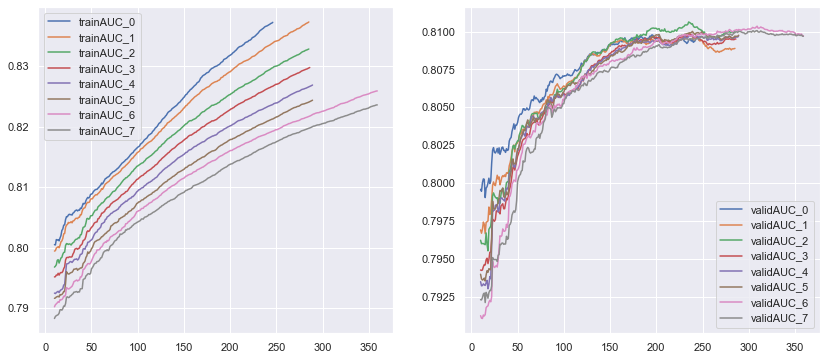

In [97]:
resHists = dict()

rang = range(0,8)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, lambdaX=x**2,
                                                          max_depth=4, subsample=0.7, colsample_bytree=0.7,
                                                          early_stopping_rounds=50, debug=False)
    
    print(x**2, score)
    resHists[x]=train_history
fig, ax = plt.subplots(1, 2, figsize=(14,6))
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

0 0.8103532803039816
0.01 0.8103572838926528
0.1 0.810315064230301
0.5 0.8098388191597196
1 0.8102408158585787
2 0.8104020512932502
5 0.8101900430749744


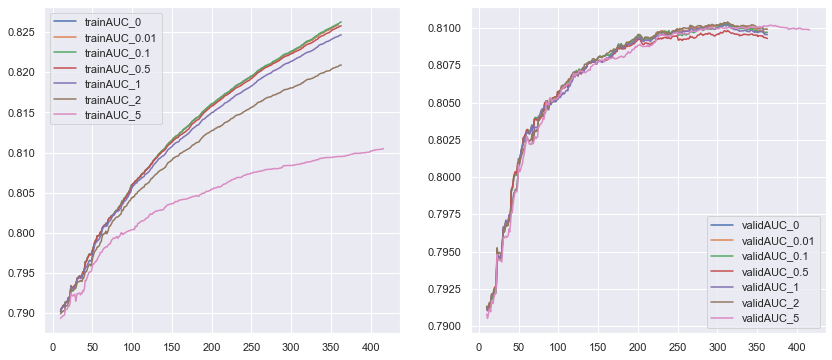

In [98]:
resHists = dict()
rang = [0, 0.01, 0.1, 0.5, 1, 2, 5]
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, lambdaX=36,
                                                          max_depth=4, subsample=0.7, colsample_bytree=0.7,
                                                          gamma=x, early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

0 0.8097736698531592
0.01 0.8097729419279464
0.1 0.809909427905377
0.5 0.8099887717535901
1 0.8100992344046573
2 0.8101780323089606
5 0.8090231789585938


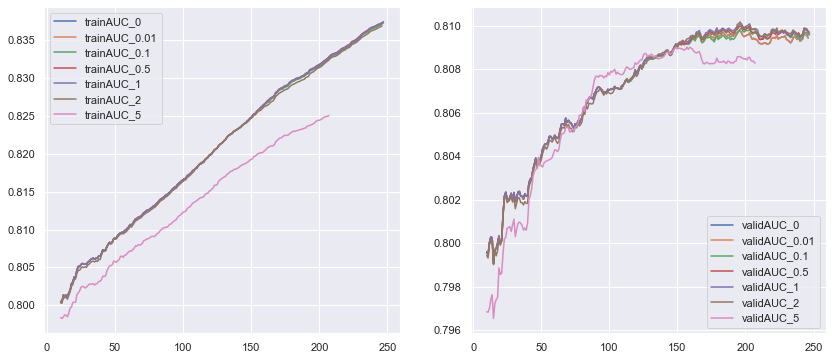

In [99]:
resHists = dict()
rang = [0, 0.01, 0.1, 0.5, 1, 2, 5]
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, lambdaX=0,
                                                          max_depth=4, subsample=0.7, colsample_bytree=0.7,
                                                          gamma=x, early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

### Stworzenie wrapera dla XGB

In [100]:
def CVTestXGB(nFolds = 5, randomState=2020, features=features, debug=False, *args, **kwargs):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    testResults = []
    trainResults = []
    
    predictions = []
    
    indices = []
    
    hists = []
    fold = 1
    for train, test in kf.split(job.index.values):
        score, trainPred, testPred, train_history, impFig, imp = run_xgb(job.iloc[train], job.iloc[test],
                                                                         features, target, debug=debug, *args, **kwargs)

        predictions.append(testPred.tolist().copy())
        
        indices.append(job.iloc[test].index.tolist().copy())

        trainScore = roc_auc_score(job[target].iloc[train], trainPred)
        testScore = roc_auc_score(job[target].iloc[test], testPred)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        hists.append(train_history.add_suffix('_'+str(fold)))
        fold+=1
        
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices, pd.concat(hists, axis=1)

#### Testowanie różnych wartości parametrów regularyzujących

In [101]:
trainResults, testResults, predictions, indices, hists = CVTestXGB(
    max_depth=4, lambdaX=36, subsample=0.7, colsample_bytree=0.7, gamma=2, debug=False)
np.mean(trainResults), np.mean(testResults)

(0.8233604691665596, 0.8036567999096367)

In [102]:
trainResults, testResults, predictions, indices, hists = CVTestXGB(
    max_depth=4, lambdaX=0, subsample=0.7, colsample_bytree=0.7, gamma=2, debug=False)
np.mean(trainResults), np.mean(testResults)

(0.8293533963056301, 0.8038113314770268)

In [103]:
trainResults, testResults, predictions, indices, hists = CVTestXGB(
    max_depth=4, lambdaX=36, subsample=0.7, colsample_bytree=0.7, gamma=0, debug=False)
np.mean(trainResults), np.mean(testResults)

(0.827391461782873, 0.8040074887654619)

#### Wyszukiwanie najlepszych parametrów przy pomocy techniki random search

In [104]:
import random
results=[]
paramList = []
for x in range(100):
    params = (random.randint(2, 9), random.uniform(0.3, 0.9), random.uniform(0.3, 0.9), random.uniform(0, 10), random.uniform(0, 10))
    trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=params[0],
        subsample = params[1],
        colsample_bytree = params[2],
        lambdaX=params[3]**2,
        gamma=params[4])
    print(np.mean(testResults), params)
    results.append(np.mean(testResults))
    paramList.append(params)

0.7995345507552962 (8, 0.41147916121239453, 0.6364375790676247, 8.222208149421805, 4.777539452484283)
0.7954749272847254 (3, 0.3398316413797101, 0.5904652228706961, 8.535523093091408, 9.275181651660805)
0.8048230116977091 (5, 0.3524935670381174, 0.8104486269564517, 1.006666838202872, 3.1685774222099194)
0.7994080540601591 (3, 0.7838571089723215, 0.8958184735401933, 7.630889562720354, 4.607012237739266)
0.8017954413957777 (3, 0.32669222460016634, 0.6952049760186718, 1.5395476092031013, 5.423908465324302)
0.8048802574315923 (8, 0.6241419925658971, 0.5766556594005728, 5.219659518895004, 3.0824776042022526)
0.8025400634792608 (7, 0.7094378809183007, 0.39304874046924004, 8.638149832092767, 3.0702478162900695)
0.7986274785889451 (9, 0.3455566345206553, 0.8937444882870234, 4.869455362884008, 8.264447483755887)
0.800542286791875 (5, 0.526387692063047, 0.34497514644111926, 8.700781697333671, 4.193345287119375)
0.804169946056214 (9, 0.42049170656681256, 0.3163704224698145, 4.993005323302197, 0.4

0.803735701731982 (4, 0.5378561744653276, 0.3749992345132254, 0.9774662172072246, 0.5023770592162946)
0.799562149825572 (3, 0.46525347809896916, 0.8870499025601895, 7.879917592167591, 4.556465131985159)
0.8016214340059176 (4, 0.6178794575729957, 0.3914147126395271, 9.395123933300603, 1.9539577026570687)
0.8024144010294882 (6, 0.878242622037418, 0.30507556155589993, 2.102725970308744, 6.195951622253139)
0.8029403668560711 (3, 0.6432640430622889, 0.46943979442713313, 2.9701199044049376, 1.3087267932515056)
0.8026490445820562 (9, 0.35870675150963954, 0.45360574288301037, 0.43746404685928164, 2.910033141572117)
0.799864410228583 (8, 0.39711970162058663, 0.8551009977651982, 8.03398809522543, 4.389095539058508)
0.8024080546272057 (3, 0.7348943832908985, 0.8208626034557007, 2.723148484748248, 2.538948691839801)
0.8051709258492197 (8, 0.8211093810367589, 0.3584154462479632, 4.812586090370701, 2.43379610766668)
0.8015842677357992 (4, 0.8045435333526751, 0.7347099426816557, 9.361824385160602, 3.

In [105]:
maxRes = []
for i in range(1, len(paramList)):
    maxRes.append(max(results[0:i]))
imp = list(zip(results, paramList))
imp.sort(reverse=True)
for row in imp[0:10]:
    print(row)

(0.8058239994426843, (8, 0.8055300454331893, 0.6310970583180107, 4.470195599647301, 2.554357430715506))
(0.8056006576110635, (6, 0.32173395540396843, 0.6777302444659088, 2.378992258481627, 0.03589882249082632))
(0.805522154114575, (7, 0.4246451998852231, 0.7435991175430863, 0.5708300015097945, 1.733690135434357))
(0.805451442899618, (7, 0.4381167799424204, 0.600280907907578, 1.2559379728222853, 2.4179983054238665))
(0.8053099482951229, (7, 0.8937655735065058, 0.7990261636802103, 1.6007056351105653, 2.4491723951978797))
(0.8052492854405099, (6, 0.8077201983412747, 0.8991387855450144, 3.592350466875458, 2.3899864478007005))
(0.8051709258492197, (8, 0.8211093810367589, 0.3584154462479632, 4.812586090370701, 2.43379610766668))
(0.8050439111153788, (8, 0.8554772464819638, 0.3641854862936691, 5.695587063154281, 1.682143958791369))
(0.8050131242737757, (7, 0.4075384767499961, 0.7397880815521227, 7.335419110648812, 0.41760457328535283))
(0.8049394056334748, (8, 0.8994839672118551, 0.4308447578

#### Zapisanie najlepszego wyniku

In [106]:
trainResults, testResults, predictions, indices, hists = CVTestXGB(
        max_depth=6, subsample = 0.5251989002567745, colsample_bytree = 0.48035650027571436, lambdaX=1.2784670634049533, gamma=0.34208577414391206)
print(np.mean(testResults))

modelXGB = {
    "name":"XGB",
    "description":"Model XGB, ze zmiennymi kategorycznymi z LE",
    "specification":'max_depth=6, subsample = 0.5251989002567745, colsample_bytree = 0.48035650027571436, lambdaX=1.2784670634049533, gamma=0.34208577414391206',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

0.8057508056859088


In [107]:
with open("model_XGB_1.p", "wb") as fp:
    pickle.dump(modelXGB, fp)

### Porównanie wyników stworzonych modeli z pomocą metryki ROC

In [108]:
with open("model_RFC_1.p", "rb") as fp:
    modelSVM = pickle.load(fp)
    
with open("model_kNN_1.p", "rb") as fp:
    modelkNN = pickle.load(fp)
    
with open("model_XGB_1.p", "rb") as fp:
    modelRF = pickle.load(fp)

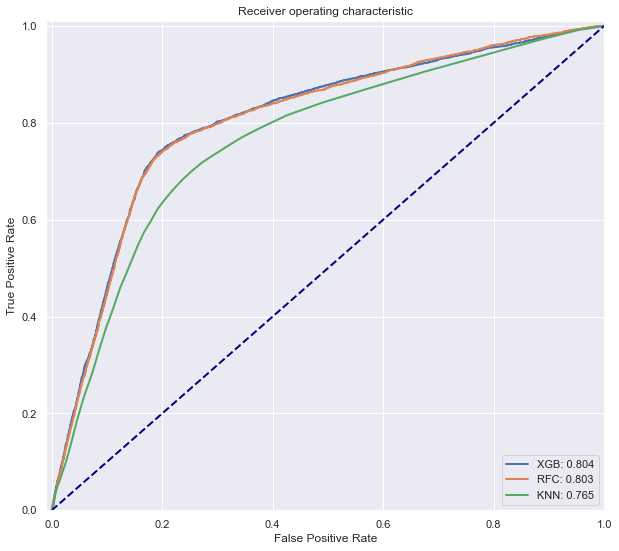

In [109]:
from helpers import plotROCs
res2plot = []
true = job[target].sort_index()
for result in [modelXGB, modelRFClass, modelkNN]:
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
plotROCs(res2plot)